In [1]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
#print('done')

In [2]:
#Load wine dataset

df = pd.read_csv('D:/SDU/thesisCodes/data/datasets_4458_8204_winequality-red.csv') # Load the data

# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#print(X)
#print(Y)

In [3]:
#Build the random forest classifier
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)

yPredRf = rf.predict(X_test)
print(metrics.classification_report(Y_test, yPredRf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       290
           1       0.54      0.47      0.50        30

    accuracy                           0.91       320
   macro avg       0.74      0.71      0.73       320
weighted avg       0.91      0.91      0.91       320



Text(0, 0.5, 'Cross-validated accuracy')

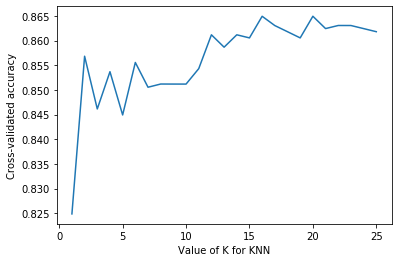

In [4]:
#Start KNN implementation. Do elbow method to define number of K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
    
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [5]:
# Train the model and use k=16
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, Y_train)
yPredKNN = knn.predict(X_test)

# classification report for test set
print(metrics.classification_report(Y_test, yPredKNN))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       290
           1       0.75      0.10      0.18        30

    accuracy                           0.91       320
   macro avg       0.83      0.55      0.57       320
weighted avg       0.90      0.91      0.88       320



In [6]:
#Train GNB model

gnb=GaussianNB()
gnb.fit(X_train,Y_train)

yPredGNB = gnb.predict(X_test)


# classification report for test set
print(metrics.classification_report(Y_test, yPredGNB))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       290
           1       0.32      0.77      0.45        30

    accuracy                           0.82       320
   macro avg       0.65      0.80      0.67       320
weighted avg       0.91      0.82      0.85       320



In [7]:
#Train XGB model

xgbModel = xgb.XGBClassifier(random_state=1)
xgbModel.fit(X_train, Y_train)
yPredXGB = xgbModel.predict(X_test)
print(metrics.classification_report(Y_test, yPredXGB))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.53      0.77      0.63        30

    accuracy                           0.92       320
   macro avg       0.75      0.85      0.79       320
weighted avg       0.93      0.92      0.92       320



In [9]:
#Train SVM model with radial kernel

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

yPredSVM = svclassifier.predict(X_test)
print(metrics.classification_report(Y_test, yPredSVM))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       290
           1       0.57      0.27      0.36        30

    accuracy                           0.91       320
   macro avg       0.75      0.62      0.66       320
weighted avg       0.89      0.91      0.90       320



In [10]:
#LIME Implementation
#Create the explainer object

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  training_labels=df['goodquality'], class_names=['Bad quality', 'Good quality'], verbose=True, mode='classification')

#Specify an index and get local explanation for that index. Change the number to explain other points
j = 319
exp = explainer.explain_instance(X_test.values[j], knn.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

exp = explainer.explain_instance(X_test.values[j], gnb.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)

exp = explainer.explain_instance(X_test.values[j], rf.predict_proba, num_features=6)
exp.show_in_notebook(show_table=True)


Intercept 0.09663142245563432
Prediction_local [0.21244145]
Right: 0.5


Intercept 0.06716574688386287
Prediction_local [0.35165591]
Right: 0.838422420759154


Intercept 0.08654076455025567
Prediction_local [0.39654925]
Right: 0.35503690930201603


Intercept 0.8923944854755802
Prediction_local [0.80596439]
Right: 0.8125
Intercept 0.8811721399144752
Prediction_local [0.83800268]
Right: 0.9375
Intercept 0.8484408090328139
Prediction_local [0.94978193]
Right: 1.0
Intercept 0.8667776099997925
Prediction_local [0.89789084]
Right: 1.0
Intercept 0.8678854822596812
Prediction_local [0.87894936]
Right: 0.9375
Intercept 0.8903097564959981
Prediction_local [0.81592782]
Right: 0.75
Intercept 0.8566048673322942
Prediction_local [0.90754454]
Right: 1.0
Intercept 0.8511213168686997
Prediction_local [0.93707404]
Right: 1.0
Intercept 0.858852650055258
Prediction_local [0.91543161]
Right: 1.0
Intercept 0.8600221371734592
Prediction_local [0.91799635]
Right: 1.0
Intercept 0.8853898951335424
Prediction_local [0.84146358]
Right: 1.0
Intercept 0.8684502115050287
Prediction_local [0.89608953]
Right: 0.9375
Intercept 0.8679562485354388
Prediction_local [0.8913593]
Right: 0.9375
Intercept 0.896935575976663
Prediction_local [0.79781596]
Right: 0.8125
Inte

Prediction_local [0.94464675]
Right: 1.0
Intercept 0.8556628649947545
Prediction_local [0.94289937]
Right: 0.875
Intercept 0.8751297862973447
Prediction_local [0.86195378]
Right: 0.8125
Intercept 0.8353905913660228
Prediction_local [0.98481653]
Right: 0.875
Intercept 0.8752612842886254
Prediction_local [0.86726975]
Right: 0.6875
Intercept 0.8853605985831878
Prediction_local [0.8442588]
Right: 0.8125
Intercept 0.8740559102954778
Prediction_local [0.85969256]
Right: 0.9375
Intercept 0.8820836154469381
Prediction_local [0.85311438]
Right: 0.625
Intercept 0.842394059417795
Prediction_local [0.96916123]
Right: 1.0
Intercept 0.09541568535421277
Prediction_local [0.22109319]
Right: 0.5625
Intercept 0.8660071857946853
Prediction_local [0.89511155]
Right: 0.8125
Intercept 0.8649653019952569
Prediction_local [0.8970934]
Right: 1.0
Intercept 0.8849788375907619
Prediction_local [0.83991408]
Right: 0.875
Intercept 0.8782869451450144
Prediction_local [0.83689729]
Right: 0.625
Intercept 0.88439085007

Prediction_local [0.21560675]
Right: 0.5
Intercept 0.8939492083457696
Prediction_local [0.80946874]
Right: 0.75
Intercept 0.09210445471309137
Prediction_local [0.23974675]
Right: 0.5625
Intercept 0.8933530181254583
Prediction_local [0.8162957]
Right: 0.875
Intercept 0.8879091039111568
Prediction_local [0.82968875]
Right: 0.9375
Intercept 0.864812941469793
Prediction_local [0.90530765]
Right: 1.0
Intercept 0.9054988998671664
Prediction_local [0.7689555]
Right: 0.625
Intercept 0.8886950189012691
Prediction_local [0.82891664]
Right: 0.75
Intercept 0.8596904231268019
Prediction_local [0.90957469]
Right: 1.0
Intercept 0.8640893250960079
Prediction_local [0.91248563]
Right: 1.0
Intercept 0.8685654588344504
Prediction_local [0.88343274]
Right: 0.9375
Intercept 0.8655649674804885
Prediction_local [0.88943869]
Right: 1.0
Intercept 0.8601712327350912
Prediction_local [0.91453617]
Right: 1.0
Intercept 0.8778506159091027
Prediction_local [0.85996991]
Right: 0.8125
Intercept 0.8650438100739882
Pred

Intercept 0.8508005494974653
Prediction_local [0.95072476]
Right: 1.0
Intercept 0.871384522255238
Prediction_local [0.88393532]
Right: 0.875
Intercept 0.8787318243195889
Prediction_local [0.84604187]
Right: 0.6875
Intercept 0.8683638393294719
Prediction_local [0.87720544]
Right: 0.9375
Intercept 0.8917832912363646
Prediction_local [0.80974841]
Right: 0.8125
Intercept 0.9132517550170453
Prediction_local [0.76233459]
Right: 0.75
Intercept 0.8699610340063426
Prediction_local [0.86542107]
Right: 0.875
Intercept 0.8802765615587741
Prediction_local [0.85393631]
Right: 0.8125
Intercept 0.8503264873417812
Prediction_local [0.93090253]
Right: 1.0
Intercept 0.8319314716147077
Prediction_local [0.99432221]
Right: 1.0
Intercept 0.8813425752721646
Prediction_local [0.84054486]
Right: 0.9375
Intercept 0.8442008763355008
Prediction_local [0.95100716]
Right: 1.0
Intercept 0.9057639279490473
Prediction_local [0.77244967]
Right: 0.75
Intercept 0.8576376947144384
Prediction_local [0.91782368]
Right: 1.0


Prediction_local [0.88419684]
Right: 1.0
Intercept 0.8958506190183043
Prediction_local [0.80941156]
Right: 0.8125
Intercept 0.8788347605939828
Prediction_local [0.86911938]
Right: 0.875
Intercept 0.8590358928802881
Prediction_local [0.89970981]
Right: 1.0
Intercept 0.844673848814055
Prediction_local [0.96018684]
Right: 0.875
Intercept 0.8725387813064778
Prediction_local [0.87038771]
Right: 0.75
Intercept 0.8683758326177402
Prediction_local [0.88091471]
Right: 1.0
Intercept 0.8889155074610258
Prediction_local [0.83717015]
Right: 0.8125
Intercept 0.8822419114737833
Prediction_local [0.85408883]
Right: 0.9375
Intercept 0.8492876585869414
Prediction_local [0.93986349]
Right: 1.0
Intercept 0.872171999225562
Prediction_local [0.87435364]
Right: 1.0
Intercept 0.8598136301530293
Prediction_local [0.90857496]
Right: 1.0
Intercept 0.8369216046899024
Prediction_local [0.98005693]
Right: 1.0
Intercept 0.8632103096779684
Prediction_local [0.90521044]
Right: 0.9375
Intercept 0.8671457099541844
Predi

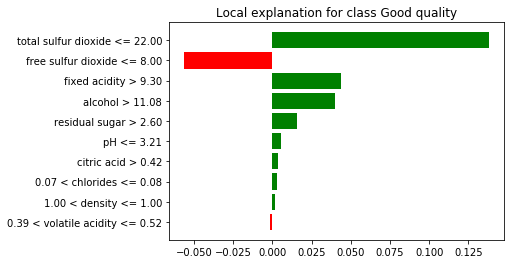

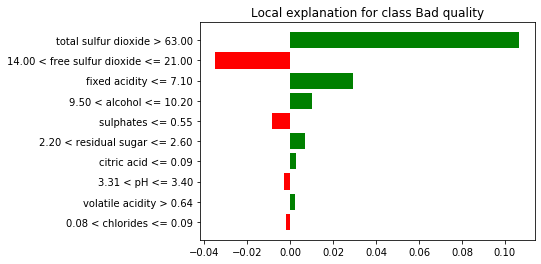

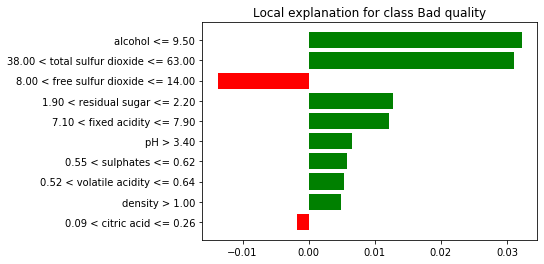

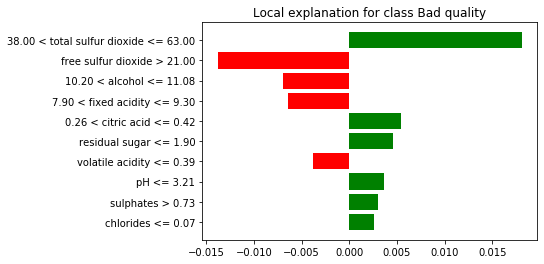

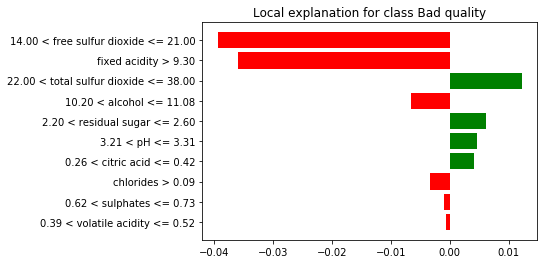

In [11]:
#SP Lime for KNN

from lime import submodular_pick
sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, knn.predict_proba, sample_size=500, num_features=10, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]


Intercept 0.9255135411063451
Prediction_local [0.69585588]
Right: 0.6672159390476485
Intercept 0.0032051190320098732
Prediction_local [0.5356326]
Right: 0.5203058512358545
Intercept 0.056434857196706836
Prediction_local [0.37633764]
Right: 0.6483572124988045
Intercept 0.8439051352771831
Prediction_local [0.92378461]
Right: 0.9740498702524747
Intercept 0.7877340307781296
Prediction_local [1.08384482]
Right: 0.9955458917782241
Intercept 0.7451979279318436
Prediction_local [1.19376726]
Right: 0.9992272039214806
Intercept 0.8145549163857896
Prediction_local [0.99772173]
Right: 0.9929629263749629
Intercept 0.8805840807639901
Prediction_local [0.82680555]
Right: 0.886634250899344
Intercept 0.8768490869512847
Prediction_local [0.81740909]
Right: 0.886634250899344
Intercept 0.884002637467383
Prediction_local [0.80200139]
Right: 0.8315479604136881
Intercept 0.834717321869031
Prediction_local [0.92896744]
Right: 0.9725465013819161
Intercept 0.7656514942735523
Prediction_local [1.15521168]
Right:

Intercept 0.7887180614708378
Prediction_local [1.09453873]
Right: 0.9987814017369834
Intercept 0.048127017438490474
Prediction_local [0.40852531]
Right: 0.862571075323918
Intercept -0.010648290349717454
Prediction_local [0.56530901]
Right: 0.9797318107900219
Intercept 0.7559611374699751
Prediction_local [1.18434688]
Right: 0.9962280486883048
Intercept 0.11758524520269933
Prediction_local [0.18872199]
Right: 0.594014092885694
Intercept 0.912729500313333
Prediction_local [0.70396896]
Right: 0.9140386009405492
Intercept 0.8935042071785116
Prediction_local [0.78199076]
Right: 0.6198598038407335
Intercept 0.8213457044609738
Prediction_local [0.99309706]
Right: 0.9851096694772099
Intercept 0.03475896477473245
Prediction_local [0.42454248]
Right: 0.8106548901043464
Intercept 0.8442114046479212
Prediction_local [0.92336975]
Right: 0.9760381943423957
Intercept 0.8372482162132676
Prediction_local [0.94420769]
Right: 0.9677201354264263
Intercept 0.007631070949268154
Prediction_local [0.52484877]


Intercept 0.08277386103603437
Prediction_local [0.31366765]
Right: 0.5982637452844097
Intercept 0.9446151633727871
Prediction_local [0.61197863]
Right: 0.7013844913913829
Intercept -0.014141528947684445
Prediction_local [0.58202734]
Right: 0.9327277082792719
Intercept 0.7741656075691763
Prediction_local [1.12776446]
Right: 0.9965540473790098
Intercept 0.011169925332603886
Prediction_local [0.5314292]
Right: 0.8997269591611728
Intercept 0.7726322211414545
Prediction_local [1.11650217]
Right: 0.9999152917243768
Intercept 0.8207171905209142
Prediction_local [0.98076884]
Right: 0.9943038093057066
Intercept 0.8386437907842508
Prediction_local [0.94760997]
Right: 0.9943559457948615
Intercept -0.04290000244462985
Prediction_local [0.68210636]
Right: 0.9944384147046872
Intercept 0.07045677809206047
Prediction_local [0.34167881]
Right: 0.9736770039568717
Intercept 0.9286933995389269
Prediction_local [0.66447301]
Right: 0.6290360405339666
Intercept 0.8256870086386537
Prediction_local [0.97210903

Intercept -0.01439488774381073
Prediction_local [0.59899688]
Right: 0.9087282339423434
Intercept 0.031577559013925074
Prediction_local [0.45973079]
Right: 0.9874182322773125
Intercept 0.8719172686703512
Prediction_local [0.83329832]
Right: 0.785313750804835
Intercept 0.0075784385472230376
Prediction_local [0.52897735]
Right: 0.6919144901460522
Intercept 0.8928085648066088
Prediction_local [0.7857491]
Right: 0.9842054138249785
Intercept 0.718110360903644
Prediction_local [1.26646544]
Right: 0.9998177593107382
Intercept 0.04791174834380704
Prediction_local [0.40633361]
Right: 0.7070579424783358
Intercept 0.792544051796909
Prediction_local [1.09250622]
Right: 0.9948765400752543
Intercept 0.9050357322638761
Prediction_local [0.74920978]
Right: 0.602670327787147
Intercept 0.7670078326717846
Prediction_local [1.16777404]
Right: 0.9992319287074423
Intercept 0.8154517480144292
Prediction_local [0.99235932]
Right: 0.9862669004680258
Intercept 0.8033032076732518
Prediction_local [1.02690543]
Rig

Prediction_local [1.05955512]
Right: 0.9919082760865424
Intercept 0.8595872328256857
Prediction_local [0.89495769]
Right: 0.9745330017646777
Intercept 0.8455680303809895
Prediction_local [0.91945221]
Right: 0.9606035906778032
Intercept 0.7541342156468948
Prediction_local [1.16312057]
Right: 0.9977184479458023
Intercept 0.0758220845366269
Prediction_local [0.31161751]
Right: 0.5542569471303177
Intercept 0.8726861357312451
Prediction_local [0.82361843]
Right: 0.9624444183005945
Intercept 0.7961898189174286
Prediction_local [1.06881183]
Right: 0.97967701467723
Intercept 0.02421272835009966
Prediction_local [0.47558053]
Right: 0.6301640302610865
Intercept 0.8757533843077145
Prediction_local [0.82125776]
Right: 0.9435818934413897
Intercept 0.8129694211995746
Prediction_local [1.02599442]
Right: 0.9961611602120825
Intercept -0.06372732657490748
Prediction_local [0.75157853]
Right: 0.932493988564394
Intercept 0.7377544594121734
Prediction_local [1.22606132]
Right: 0.9999771437316071
Intercept

Right: 0.6359627891800063
Intercept 0.9197216430115506
Prediction_local [0.71054664]
Right: 0.9318482917194457
Intercept 0.7920617548297821
Prediction_local [1.05494321]
Right: 0.9956614121480558
Intercept 0.8205406154473508
Prediction_local [0.97993854]
Right: 0.9923796128975877
Intercept 0.8080698358801477
Prediction_local [1.02987345]
Right: 0.9942968268872578
Intercept 0.8520918549186995
Prediction_local [0.89867758]
Right: 0.9620004524582982
Intercept 0.8506018642635821
Prediction_local [0.89903701]
Right: 0.9266725475152249
Intercept 0.8519091700085496
Prediction_local [0.90495469]
Right: 0.9630810956068159
Intercept 0.7974325469094294
Prediction_local [1.05299322]
Right: 0.995341442765684
Intercept 0.8525145669634208
Prediction_local [0.88824318]
Right: 0.964130085944897
Intercept 0.8065047761093393
Prediction_local [1.02443461]
Right: 0.999999994476152
Intercept 0.7881518619582261
Prediction_local [1.09523296]
Right: 0.999828697632528
Intercept 0.8068669236550329
Prediction_loc

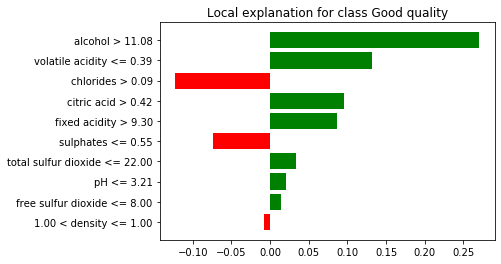

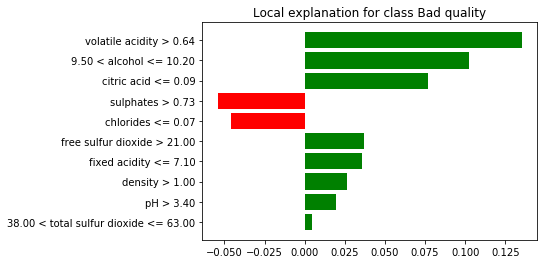

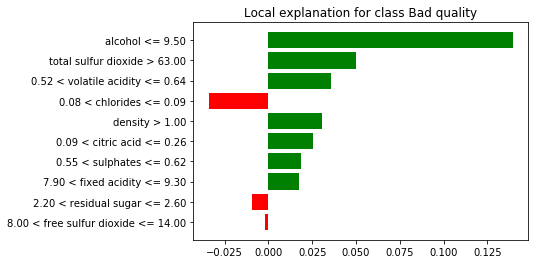

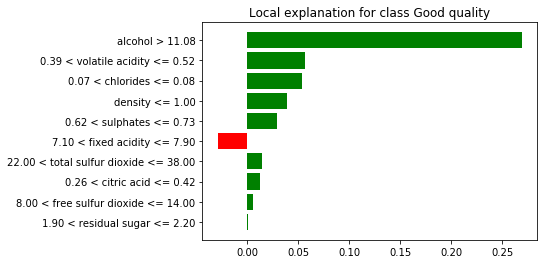

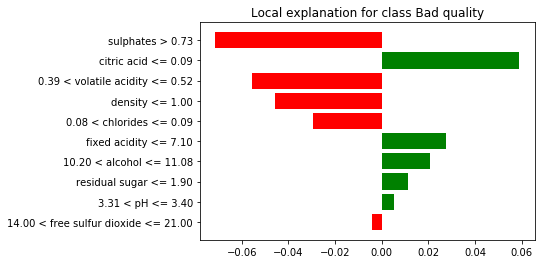

In [12]:
#SP LIME for GNB

sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, gnb.predict_proba, sample_size=500, num_features=10, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]


Intercept 0.772846526066644
Prediction_local [1.03018278]
Right: 0.9959726437706508
Intercept 0.8322731028087711
Prediction_local [0.84878915]
Right: 0.987109845892381
Intercept 0.8651710769808083
Prediction_local [0.75669716]
Right: 0.662584915084915
Intercept 0.7902006273420707
Prediction_local [0.96509459]
Right: 0.9703309643953906
Intercept 0.8212509224442058
Prediction_local [0.88180546]
Right: 0.9840978631628282
Intercept 0.8530909425878254
Prediction_local [0.77577226]
Right: 0.9277818707391632
Intercept 0.7858052195212574
Prediction_local [0.99254322]
Right: 0.9905318646494503
Intercept 0.7916403159059583
Prediction_local [0.96202855]
Right: 0.9820314457490351
Intercept 0.9411653960732468
Prediction_local [0.52232404]
Right: 0.6932119965372239
Intercept 0.7689011921309821
Prediction_local [1.02731777]
Right: 0.9849090707357103
Intercept 0.7958765265563509
Prediction_local [0.9583022]
Right: 0.9686426233648963
Intercept 0.10992034406949891
Prediction_local [0.31693976]
Right: 0.

Prediction_local [0.62566232]
Right: 0.9192263544536271
Intercept 0.8167845338904227
Prediction_local [0.88831873]
Right: 0.9436423810269297
Intercept 0.8697838699023803
Prediction_local [0.73473211]
Right: 0.7101526251526252
Intercept 0.7745831747277921
Prediction_local [1.02561079]
Right: 0.9927507356144918
Intercept 0.8650171260831554
Prediction_local [0.77076068]
Right: 0.8989201149573759
Intercept 0.8309503007150765
Prediction_local [0.87007591]
Right: 0.9307419517971827
Intercept 0.8162130908716385
Prediction_local [0.87854367]
Right: 0.9950704225352112
Intercept 0.7822224416581068
Prediction_local [1.01034644]
Right: 0.9848976131472545
Intercept 0.7972772281309892
Prediction_local [0.9663131]
Right: 0.914600479926175
Intercept 0.8135571412351368
Prediction_local [0.90988133]
Right: 0.9700525740880526
Intercept 0.9263597994976708
Prediction_local [0.56626136]
Right: 0.5013883345091019
Intercept 0.8337941952772402
Prediction_local [0.85553045]
Right: 0.9679557532537604
Intercept 0

Right: 0.504311466827182
Intercept 0.8780570122095878
Prediction_local [0.72136601]
Right: 0.978796117714855
Intercept 0.8147975076554613
Prediction_local [0.92499666]
Right: 0.9872231269000343
Intercept 0.8201313955092495
Prediction_local [0.87751197]
Right: 0.9812574810480117
Intercept 0.10108664171550592
Prediction_local [0.33331356]
Right: 0.6485741164210908
Intercept 0.8010423366174828
Prediction_local [0.9514332]
Right: 0.9923299698201176
Intercept 0.022777362704290982
Prediction_local [0.59041205]
Right: 0.7052287723342286
Intercept 0.8032076936189587
Prediction_local [0.91942386]
Right: 0.9345523893302927
Intercept 0.7843998799961174
Prediction_local [1.00134009]
Right: 0.9770925572526459
Intercept 0.10508175747026047
Prediction_local [0.32736997]
Right: 0.575172797234507
Intercept 0.7833923938745604
Prediction_local [1.00248995]
Right: 0.9758335579310078
Intercept 0.7591763476230187
Prediction_local [1.06170148]
Right: 0.9969543822316798
Intercept 0.8112236992330155
Prediction

Intercept 0.7833813186701679
Prediction_local [0.9918118]
Right: 0.9920819042886153
Intercept 0.7571071346730212
Prediction_local [1.04462633]
Right: 0.9687480674994644
Intercept 0.7851447390361784
Prediction_local [0.99634933]
Right: 0.9951082510642392
Intercept 0.8226537205317367
Prediction_local [0.86963094]
Right: 0.9944375111428062
Intercept 0.8836144501738338
Prediction_local [0.70189751]
Right: 0.8662999588254616
Intercept 0.8886208656336985
Prediction_local [0.68666352]
Right: 0.6847725001042614
Intercept 0.06167987413217357
Prediction_local [0.47178574]
Right: 0.5089704757355824
Intercept 0.7743385552413641
Prediction_local [1.04061802]
Right: 0.9959726437706508
Intercept 0.8704372894241331
Prediction_local [0.75488129]
Right: 0.9349144050487986
Intercept 0.8857271178565593
Prediction_local [0.69650755]
Right: 0.8181282653901828
Intercept 0.7933023643023325
Prediction_local [0.96987664]
Right: 0.9881817209634095
Intercept 0.8612483570793699
Prediction_local [0.78174233]
Right:

Prediction_local [0.31970824]
Right: 0.8976073993882532
Intercept 0.817764783520482
Prediction_local [0.92792277]
Right: 0.9912952234280764
Intercept 0.8037894536999471
Prediction_local [0.9375224]
Right: 0.9859690868224646
Intercept 0.7979878425623622
Prediction_local [0.94238068]
Right: 0.9871236476118742
Intercept 0.7842186284387572
Prediction_local [0.97495449]
Right: 0.9660316654228425
Intercept 0.058307388287712925
Prediction_local [0.4702566]
Right: 0.7140366108577871
Intercept 0.7878862479114749
Prediction_local [0.99904845]
Right: 0.987732930675504
Intercept 0.8390691726747805
Prediction_local [0.81757605]
Right: 0.9112203440422757
Intercept 0.9151412814266818
Prediction_local [0.61180919]
Right: 0.607493640478908
Intercept 0.7994774517839155
Prediction_local [0.95750491]
Right: 0.9925940615685391
Intercept 0.9139481986780494
Prediction_local [0.6191822]
Right: 0.8104800307219662
Intercept 0.8140005434286176
Prediction_local [0.90676713]
Right: 0.961937152686794
Intercept 0.79

Intercept 0.8262021904190747
Prediction_local [0.86982739]
Right: 0.9847982977767036
Intercept 0.7726643979048619
Prediction_local [1.02582563]
Right: 0.9893391380567274
Intercept 0.7801213121840842
Prediction_local [1.00603167]
Right: 0.9756919237599189
Intercept 0.8907894281311279
Prediction_local [0.67195252]
Right: 0.813901098901099
Intercept 0.9151645651614626
Prediction_local [0.60824785]
Right: 0.8312716320085405
Intercept 0.06850291813135514
Prediction_local [0.44351142]
Right: 0.6501227645541793
Intercept 0.8044579016724325
Prediction_local [0.94022897]
Right: 0.9910586439663838
Intercept 0.08527423225753991
Prediction_local [0.37885892]
Right: 0.9351073993882532
Intercept 0.7830622005407
Prediction_local [1.01040104]
Right: 0.9866176429313199
Intercept 0.10413385625549229
Prediction_local [0.34040802]
Right: 0.6485741164210908
Intercept 0.8677259592598253
Prediction_local [0.75597483]
Right: 0.9232535473205676
Intercept 0.872261648786861
Prediction_local [0.74988115]
Right: 0

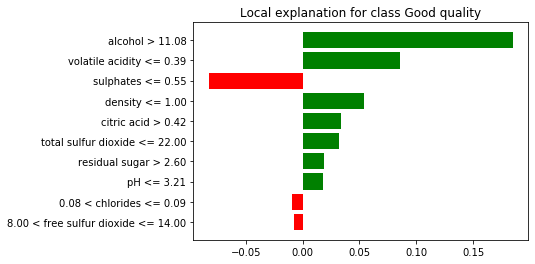

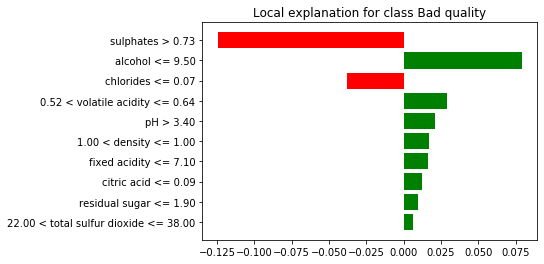

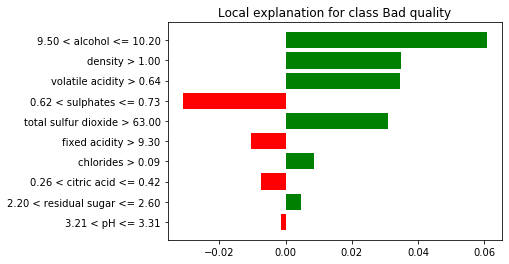

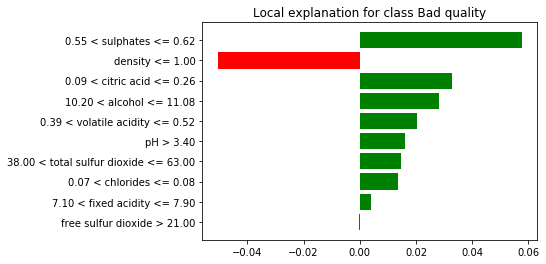

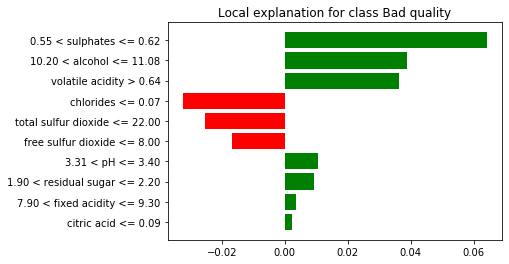

In [13]:
#SP LIME for RF

sp_obj = submodular_pick.SubmodularPick(explainer, X_train.values, rf.predict_proba, sample_size=500, num_features=10, num_exps_desired=5)
#Plot the 5 explanations
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_obj.sp_explanations];
# Make it into a dataframe
W_pick=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.sp_explanations]).fillna(0)
 
W_pick['prediction'] = [this.available_labels()[0] for this in sp_obj.sp_explanations]
 
#Making a dataframe of all the explanations of sampled points
W=pd.DataFrame([dict(this.as_list(this.available_labels()[0])) for this in sp_obj.explanations]).fillna(0)
W['prediction'] = [this.available_labels()[0] for this in sp_obj.explanations]
